wordCloud

In [2]:
#!pip install wordcloud

In [1]:
from wordcloud import WordCloud, STOPWORDS #불용어처리
from nltk.corpus import stopwords
from PIL import Image #이미지로 보이지만 숫자이므로
import numpy as np
import matplotlib.pyplot as plt

stopword 비교

In [2]:
sw_nltk=stopwords.words('english')
print(sw_nltk)
print(len(sw_nltk))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [3]:
#wordcloud에서 제공하는 불용어
sw_wc=STOPWORDS
print(sw_wc)
print(len(sw_wc))

{'theirs', "we'll", "weren't", 'ought', 'com', 'would', 'no', "wouldn't", 'her', 'or', "there's", 'otherwise', "hasn't", 'how', 'having', 'him', 'them', "you've", 'itself', 'below', "they'd", 'why', 'am', "they'll", 'had', 'most', "i've", 'other', 'over', 'too', "where's", 'yourself', 'else', "shouldn't", 'yours', 'from', 'again', "wasn't", 'before', 'http', 'ours', 'during', "he's", 'himself', 'r', 'to', 'with', "couldn't", 'some', 'we', "who's", 'into', 'each', "haven't", 'whom', 'nor', 'of', 'themselves', 'me', "she'd", 'so', "what's", 'be', 'those', 'once', 'however', "didn't", "she's", 'by', "doesn't", "i'd", "shan't", "i'll", 'at', 'are', "you're", "why's", "can't", 'than', "we're", 'can', 'should', "he'd", 'there', 'about', "it's", 'www', 'it', "aren't", 'a', 'its', "won't", 'few', 'only', 'such', 'while', 'he', 'could', 'you', 'also', 'since', 'your', "he'll", 'up', 'same', "we've", 'and', 'both', 'as', 'hence', 'being', "when's", 'all', "don't", 'out', 'here', 'were', 'these',

1. Alice in Wonderland

In [4]:
with open('Alice.txt') as file:
    text=file.read()

In [5]:
#전처리 없이 그냥 해보기
wc=WordCloud( #괄호 안에 매개변수를 넣어주면 됨
    background_color='white',
    max_words=2000, #단어 개수
    stopwords=sw_wc
).generate(text) #괄호 안에 데이터를 넣어주면 됨

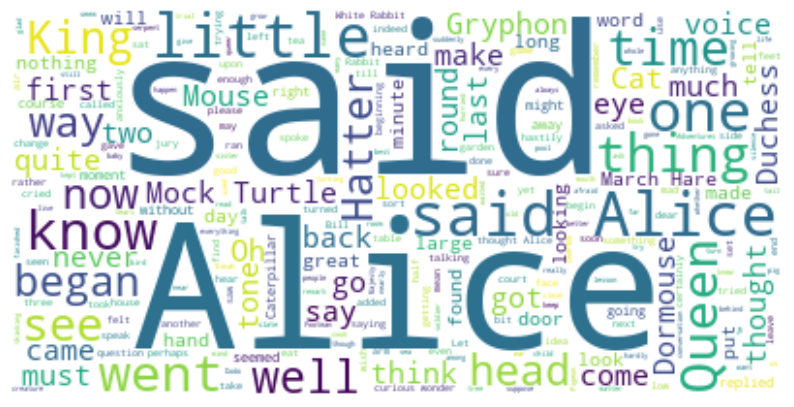

In [6]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear') #모서리를 둥글게 만들어주는 옵션
plt.axis('off')
plt.show()

In [7]:
#사용빈도 Top10
count = 0 #변수 초기화
for key, val in wc.words_.items(): #items로 단어 딕셔너리 풀어주기
    print(f'{key}:\t{val}')
    count += 1
    if count >=10:
        break #count가 10을 넘어가면 break

#몇 번 나왔는지 비율로 보여줌

said:	1.0
Alice:	0.7225433526011561
said Alice:	0.3352601156069364
little:	0.31213872832369943
one:	0.29190751445086704
know:	0.26011560693641617
went:	0.2398843930635838
thing:	0.23121387283236994
time:	0.22254335260115607
Queen:	0.21965317919075145


In [8]:
#stopwords에 의미없는 단어 'said' 추가
sw_wc.add('said')
wc=WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=sw_wc
).generate(text)

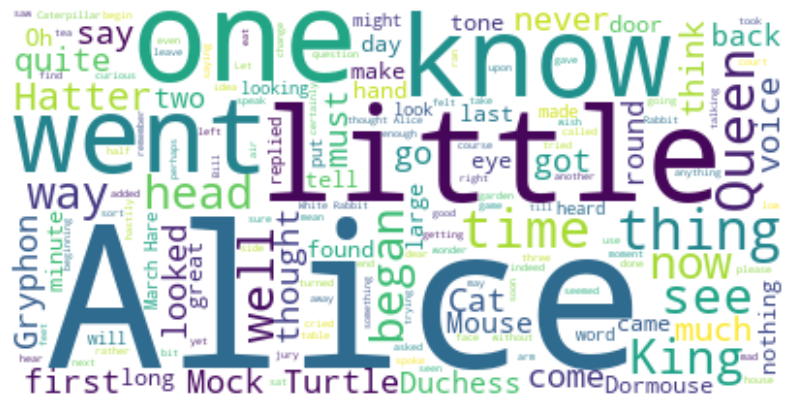

In [9]:
plt.figure(figsize=(10,6))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
#빈도수
count=0
for key, val in wc.words_.items():
    print(f'{key}:\t{val}')
    count+=1
    if count>=10:
        break

Alice:	1.0
little:	0.29508196721311475
one:	0.27595628415300544
know:	0.2459016393442623
went:	0.226775956284153
thing:	0.2185792349726776
time:	0.2103825136612022
Queen:	0.20765027322404372
see:	0.1830601092896175
King:	0.17486338797814208


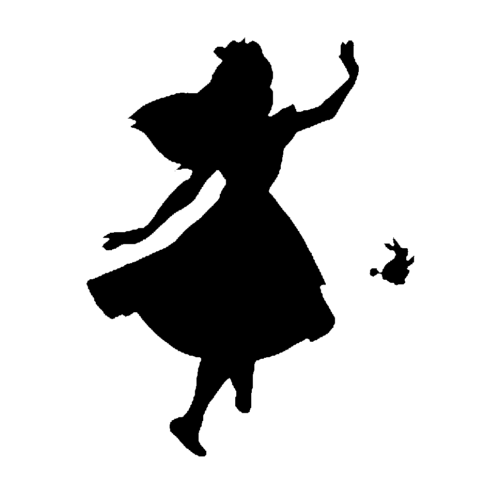

In [11]:
#배경 그림 위 표시
mask=np.array(Image.open('Alice_mask.png')) #그림을 불러와서 mask안에 넣음
plt.figure(figsize=(6,10))
plt.imshow(mask,cmap=plt.cm.gray, interpolation='bilinear') #흑백영역 지정. 모서리 둥글게
plt.axis('off') #축 끄고 그림만
plt.show()


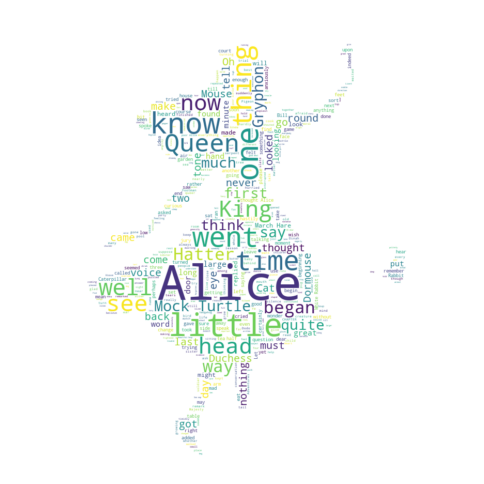

In [12]:
wc=WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=sw_wc,
    mask=mask #매개변수=앨리스 그림
).generate(text)
plt.figure(figsize=(6,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()